# Разработка стратегии взаимодействия с клиентами для сети фитнес-центров

**Оглавление**

* [Информация о проекте](#Информация-о-проекте)
    * [Бизнес-задача](#Бизнес-задача)
    * [План выполнения проекта](#План-выполнения-проекта)
    * [Описание данных](#Описание-данных)
* [Подготовка проекта к анализу](#Подготовка-проекта-к-анализу)
* [Исследовательский анализ данных (EDA)](#Исследовательский-анализ-данных-(EDA))
* [Модель прогнозирования оттока клиентов](#Модель-прогнозирования-оттока-клиентов)
* [Кластеризация клиентов](#Кластеризация-клиентов)
* [Выводы и базовые рекомендации по работе с клиентами](#Выводы-и-базовые-рекомендации-по-работе-с-клиентами)

## Информация о проекте

### Бизнес-задача
Подготовить план действий по удержанию клиентов

Совместно с отделом маркетинга подготовлены 9 гипотез для увеличения выручки. Необходимо провести их приоритизацию, после чего провести A/B тест и проанализировать результаты.


### Исследовательские задачи

*    Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;

*    Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

*    Проанализировать основные признаки, наиболее сильно влияющие на отток;

*    Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
            - 1) выделить целевые группы клиентов;
            - 2) предложить меры по снижению оттока;
            - 3) определить другие особенности взаимодействия с клиентами.

### Описание данных

* `Churn` — факт оттока в текущем месяце;
    * Текущие поля в датасете:
        * Данные клиента за предыдущий до проверки факта оттока месяц:
            * `gender` — пол;
            * `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
            * `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
            * `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
            * `Phone` — наличие контактного телефона;
            * `Age` — возраст;
            * `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
    * Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
        * `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
        * `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
        * `Group_visits` — факт посещения групповых занятий;
        * `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
        * `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
        * `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Подготовка проекта к анализу

Подключим необходимые библиотеки и откроем файлы с данными.

In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv(input())

In [3]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


## Исследовательский анализ данных (EDA)

Проверим датасет: есть ли в нем отсутствующие признаки? Изучим средние значения и стандартные отклонения.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Пропусков / отсутствующих признаков в датасете не обнаружено.

В целом по выборке:
* Распределение пола близко к интуитивно ожидаемым значениям: примерно пополам;
* Большинство (почти 85%) проживают или работают в районе, где расположен фитнес-центр;
* Почти половина клиентов (~49%) - сотрудники компаний-партнёров клуба;
* Около трети (~31%) клиентов - участники программы "Приведи друга" (первоначально зарегистрировались по приглашению действующего клиента);
* Для большинства (90%) клиентов указан контактный телефон;
* Средний период контракта близок к 6 месяцам;
* Около 41% клиентов посещали групповые занятия в клубе;
* Средний возраст клиентов клуба - 29 лет;
* Средняя суммарная выручка от других услуг фитнес-центра на пользователя - около 150 рублей (негусто);
* Средний срок до окончания текущего действующего абонемента (в месяцах) - около 4 месяцев (4.3);
* Средний лайфтайм (время с момента первого обращения в фитнес-центр) также около 4 месяцев (3.7);
* Средняя частота посещений в неделю за все время с начала действия абонемента - около 2 посещений (1.88);
* Средняя частота посещений в неделю за предыдущий месяц - 1.77;
* Средний отток - около четверти (26.5%)

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [6]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Остановимся только на тех показателях, которые заметно отличаются среди ушедших и оставшихся клиентов.
* Ушедшие реже живут или работают рядом с клубом (однако, таких среди ушедших всё ещё большинство - ~77%);
* Ушедшие клиенты реже приходят по приглашению друга или являются сотрудниками компаний-партнёров клуба;
* В среднем ушедшие клиенты склонны заключать короткие контракты - 1.7 месяца против 5.7 месяцев для оставшихся;
* Ушедшие клиенты несколько моложе - примерно на 3 года (30 vs 27 лет);
* Ожидаемо, ушедшие клиенты показывают худшие результаты по всем признакам, фиксирующимся в журнале посещений: они меньше тратят, их абонемент заканчивается в обозримом будущем, они реже посещают зал;
* Лайфтайм ушедших клиентов значительно (почти в 5 раз) ниже лайфтайма оставшихся - показатель отсутствия привычки к посещению зала.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

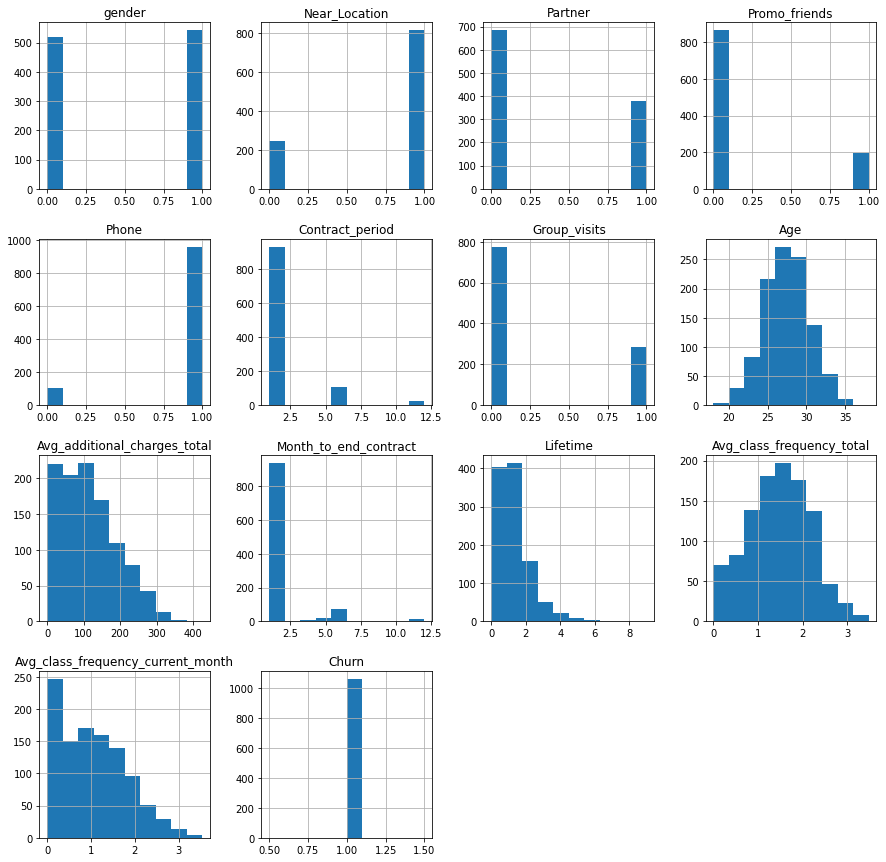

In [7]:
df[df['Churn']==1].hist(figsize=(15,15));

Большинство признаков среди ушедших смещены вправо. Исключение - возраст. Переменные, принимающие по сути булевы значения, рассмотрены выше.

Посмотрим на распределения признаков тех, кто остался пользователями.

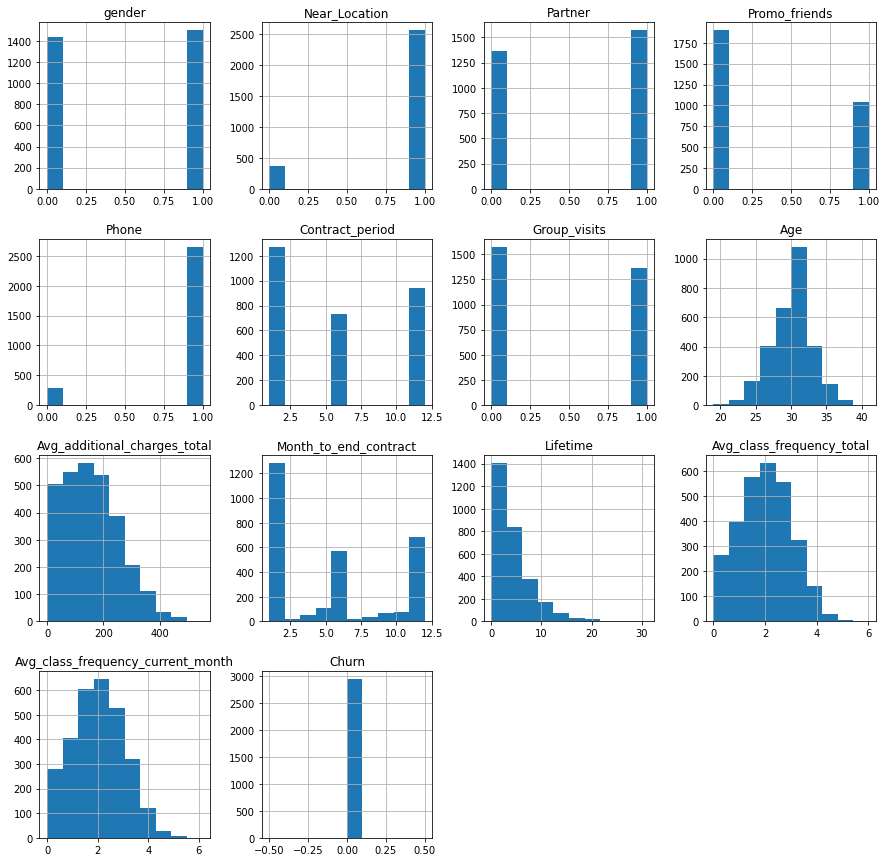

In [8]:
df[df['Churn']==0].hist(figsize=(15,15));

Аналогично потерянным пользователям, среди оставшихся большинство признаков смещены вправо, с тем же самым исключением в виде возраста.

Построим матрицу корреляций и посмотрим на неё.

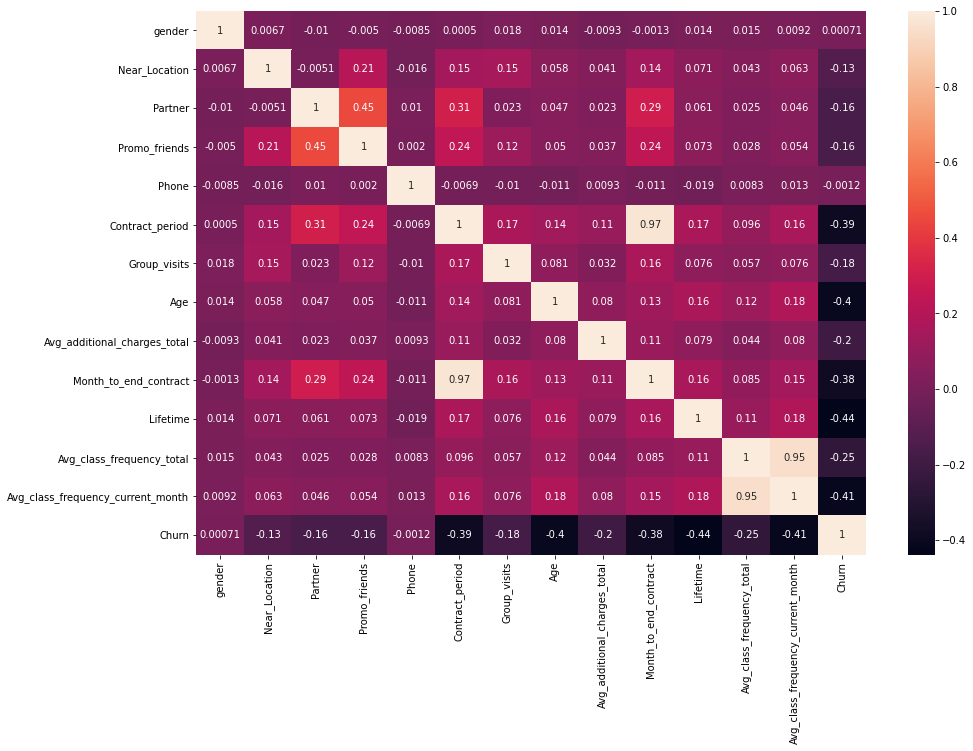

In [9]:
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

Сильнее других с фактом оттока коррелируют показатели журнала посещений, срок абонемента, возраст и лайфтайм клиента. Чем моложе клиент, чем более краткосрочный у него контракт и чем ближе дата его окончания, чем реже клиент посещал зал - тем более вероятно, что такой клиент абонемент НЕ продлит.

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
* Разобьём данные на обучающую и валидационную выборку функцией train_test_split().
* Обучим модель на train-выборке двумя способами:
    * логистической регрессией,
    * случайным лесом.

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели и выберем лучшую.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn']), df['Churn'], test_size=0.2, random_state=42)

# зададим список моделей
models = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42)]

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probanilites = model.predict_proba(X_test)[:, 1]
    print("Метрики для модели", model)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Метрики для модели LogisticRegression(random_state=42)
Accuracy: 0.91
Precision: 0.87
Recall: 0.76
Метрики для модели RandomForestClassifier(random_state=42)
Accuracy: 0.91
Precision: 0.85
Recall: 0.78


Показатели метрик используемых моделей близки.

Логистическая регрессия показывает несколько лучший Precision, тогда как случайный лес - лучший Recall. 

Напомним, что обозначает каждая из метрик:
* Precision - доля правильных ответов среди целевого класса.
* Recall - доля реальных объектов искомого класса, которые мы смогли обнаружить с помощью модели.

Если исходить из того, что потеря клиента для бизнеса дороже, чем его удержание, то Recall - более предпочтительная метрика. На этом основании рекомендацией будет выбрать модель на основе случайного леса.

## Кластеризация клиентов

В рамках задачи кластеризации выполним следущие действия:

* Стандартизируем данные.
* Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить.
* Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.
* Посмотрим на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
* Построим распределения признаков для кластеров. Можно ли что-то заметить по ним?
* Для каждого полученного кластера посчитаем долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [11]:
sc = StandardScaler()
X_sc = sc.fit_transform(df.drop(columns=['Churn'])) # стандартизуем без Churn
linked = linkage(X_sc, method = 'ward')

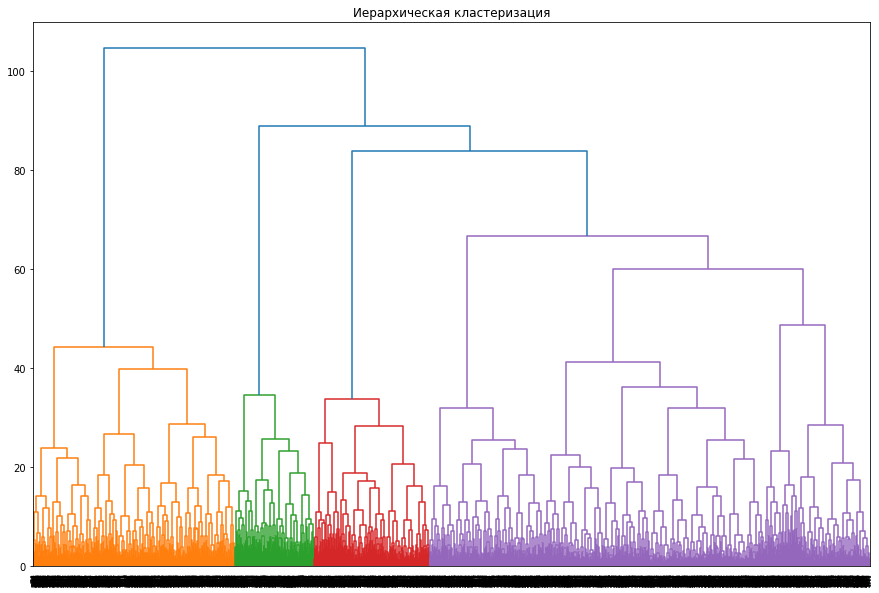

In [12]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

Согласно автоматической визуализации иерархической кластеризации, мы можем выделить четыре кластера. При этом, один из них получается достаточно разнородным - потенциально его можно разбивать дополнительно.

По условиям задания нам необходимо проанализировать пять кластеров (для сравнимости выводов) - будем придерживаться этого числа.

In [13]:
km = KMeans(n_clusters = 5, random_state=2402)
labels = km.fit_predict(X_sc)
df['cluster_km'] = labels
display(df.groupby('cluster_km').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.593625,0.972112,0.281541,0.116866,0.895086,2.907039,0.484728,30.321381,163.013091,2.664011,5.183267,2.922966,2.927890,0.057105
1,0.501604,0.944385,0.742246,0.489840,0.900535,11.878075,0.551872,29.920856,164.982551,10.869519,4.706952,1.994082,1.985368,0.022460
2,0.483216,1.000000,0.243816,0.010601,0.902827,1.985866,0.322438,28.219081,131.371696,1.902827,2.450530,1.305629,1.070777,0.516784
3,0.485804,1.000000,0.805994,1.000000,0.908517,3.102524,0.451104,29.078864,140.097349,2.881703,3.610410,1.682177,1.565955,0.263407
4,0.494505,0.000000,0.465201,0.076923,0.915751,2.225275,0.214286,28.478022,134.126172,2.089744,2.805861,1.659607,1.469327,0.448718


Самые "надёжные" в смысле оттока кластеры - нулевой и первый.
Все кластеры характеризуются схожим распределением клиентов по полу. 

* Первый кластер очень лоялен. Клиенты, попавшие в него, живут либо работают поблизости от клуба, являются сотрудниками компаний-партнёров, покупали абонемент по реферальной программе, их абонемент рассчитан на долгий срок. Кроме того, они чаще других посещают зал, довольно ходят на групповые занятия (хотя по этому показателю уступают первому кластеру).

* Нулевой кластер также состоит из лояльных клиентов. При этом, они реже имели более мягкие условия покупки абонемента - лишь около четверти из них работают в компаниях-партнёрах, и только десятая часть пришла по рекомендации друга. Их абонемент значительно короче абонемента людей из первого кластера, с другой стороны - они частые посетители групповых занятий. При этом по частоте посещения фитнес-центра этот кластер - абсолютный лидер. Основная опасность для них - скорое окончание абонемента, тем не менее, в отсутствие внешних шоков нет оснований полагать, что он не будет продлён.

* Наиболее уязвимый кластер - второй. Несмотря на близость места работы / жилья к клубу, клиенты, попавшие в этот кластер, с большой вероятностью перестанут посещать зал. В среднем, абонемент для них дороже, чем для клиентов из другого кластера - лишь четверть является сотрудниками компаний-партнёров, и только 1% пришёл по рекомендации друзей. Их абонемент пробный, он не рассчитан на долгий срок. Сравнительно небольшое их число посещает групповые занятия (33% - больше, чем в 4 кластере, но меньше, чем во всех остальных), кроме того - они меньше всех совершают дополнительные траты в клубе. Это кластер людей, которые не уверены в своём выборе и не особо заинтересованы в услугах фитнес-центра.

* Основная особенность четвёртого кластера - также довольно рискованного с точки зрения вероятности оттока - в том, что клиенты, попавшие в этот кластер, и работают, и живут не в районе расположения фитнес-центра. Географическая удалённость ведёт к низким показателям по остальным переменным.

* Третий кластер характеризуется средними показателями по большинству переменных. Это довольно большая зона неопределённости - показатель оттока здесь не отличается от выборки в целом. На основе наших данных тяжело выделить какие-либо специфические характеристики клиентов, попавших в этот кластер - за ними нужно продолжить наблюдение.

In [14]:
for col in df.drop(columns=['cluster_km']).columns:
    print('Распределение переменной', col, 'по кластерам')
    display(df.groupby('cluster_km')[col].describe().transpose())
    print('\n')

Распределение переменной gender по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,0.593625,0.501604,0.483216,0.485804,0.494505
std,0.491483,0.500265,0.499939,0.500193,0.500428
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000




Распределение переменной Near_Location по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.0,634.0,546.0
mean,0.972112,0.944385,1.0,1.0,0.0
std,0.164763,0.229299,0.0,0.0,0.0
min,0.000000,0.000000,1.0,1.0,0.0
25%,1.000000,1.000000,1.0,1.0,0.0
50%,1.000000,1.000000,1.0,1.0,0.0
75%,1.000000,1.000000,1.0,1.0,0.0
max,1.000000,1.000000,1.0,1.0,0.0




Распределение переменной Partner по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,0.281541,0.742246,0.243816,0.805994,0.465201
std,0.450049,0.437632,0.429573,0.395746,0.499245
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000




Распределение переменной Promo_friends по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.0,546.000000
mean,0.116866,0.489840,0.010601,1.0,0.076923
std,0.321474,0.500164,0.102458,0.0,0.266714
min,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.000000,0.000000,1.0,0.000000
50%,0.000000,0.000000,0.000000,1.0,0.000000
75%,0.000000,1.000000,0.000000,1.0,0.000000
max,1.000000,1.000000,1.000000,1.0,1.000000




Распределение переменной Phone по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,0.895086,0.900535,0.902827,0.908517,0.915751
std,0.306646,0.299446,0.296324,0.288522,0.278016
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000




Распределение переменной Contract_period по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,2.907039,11.878075,1.985866,3.102524,2.225275
std,2.783761,0.847026,2.076302,2.532673,2.515745
min,1.000000,6.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,1.000000,1.000000,1.000000
50%,1.000000,12.000000,1.000000,1.000000,1.000000
75%,6.000000,12.000000,1.000000,6.000000,1.000000
max,12.000000,12.000000,12.000000,12.000000,12.000000




Распределение переменной Group_visits по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,0.484728,0.551872,0.322438,0.451104,0.214286
std,0.500099,0.497568,0.467616,0.497996,0.410702
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000




Распределение переменной Age по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,30.321381,29.920856,28.219081,29.078864,28.478022
std,3.064950,3.066386,3.253464,3.150279,3.188925
min,21.000000,20.000000,18.000000,20.000000,18.000000
25%,28.000000,28.000000,26.000000,27.000000,26.000000
50%,30.000000,30.000000,28.000000,29.000000,29.000000
75%,32.000000,32.000000,30.000000,31.000000,31.000000
max,39.000000,38.000000,41.000000,37.000000,37.000000




Распределение переменной Avg_additional_charges_total по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,163.013091,164.982551,131.371696,140.097349,134.126172
std,103.639795,100.712986,87.167852,91.812233,93.408449
min,0.510545,0.251606,0.171862,0.148205,0.972250
25%,79.595289,83.032710,60.582695,62.365274,59.171116
50%,148.434052,160.802279,118.864739,129.997807,124.439167
75%,230.770807,236.344431,188.065491,207.134563,190.955085
max,476.432655,552.590740,496.172222,411.711309,534.256182




Распределение переменной Month_to_end_contract по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,2.664011,10.869519,1.902827,2.881703,2.089744
std,2.392918,1.756018,1.910303,2.299161,2.257141
min,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,10.000000,1.000000,1.000000,1.000000
50%,1.000000,12.000000,1.000000,1.000000,1.000000
75%,6.000000,12.000000,1.000000,6.000000,1.000000
max,12.000000,12.000000,12.000000,6.000000,12.000000




Распределение переменной Lifetime по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,5.183267,4.706952,2.450530,3.610410,2.805861
std,4.322244,3.908442,2.837825,3.694232,3.130032
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000
50%,4.000000,4.000000,2.000000,3.000000,2.000000
75%,7.000000,6.000000,3.000000,5.000000,4.000000
max,29.000000,31.000000,22.000000,24.000000,24.000000




Распределение переменной Avg_class_frequency_total по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,2.922966,1.994082,1.305629,1.682177,1.659607
std,0.708810,0.965562,0.637992,0.828559,0.835615
min,1.129123,0.000000,0.000000,0.000000,0.000000
25%,2.412063,1.303755,0.852997,1.094088,1.054747
50%,2.823535,2.037569,1.340453,1.700033,1.602536
75%,3.368606,2.692005,1.778186,2.295887,2.201152
max,6.023668,5.079242,2.910890,3.521418,3.898184




Распределение переменной Avg_class_frequency_current_month по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,2.927890,1.985368,1.070777,1.565955,1.469327
std,0.718197,0.969592,0.666168,0.900867,0.928308
min,1.070853,0.000000,0.000000,0.000000,0.000000
25%,2.406633,1.307831,0.546117,0.915362,0.779772
50%,2.849407,2.030109,1.105748,1.590482,1.428180
75%,3.364540,2.686021,1.585381,2.260126,2.117589
max,6.146783,4.976680,2.812503,3.555315,3.943236




Распределение переменной Churn по кластерам


cluster_km,0,1,2,3,4
count,753.000000,935.000000,1132.000000,634.000000,546.000000
mean,0.057105,0.022460,0.516784,0.263407,0.448718
std,0.232197,0.148253,0.499939,0.440829,0.497819
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Распределение переменной gender по кластерам


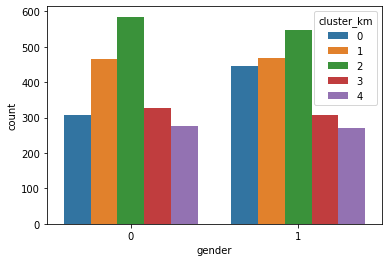

Распределение переменной Near_Location по кластерам


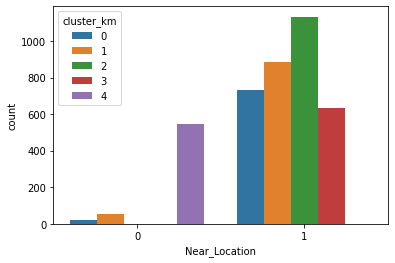

Распределение переменной Partner по кластерам


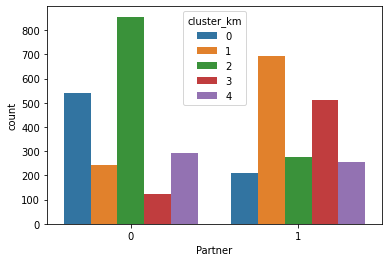

Распределение переменной Promo_friends по кластерам


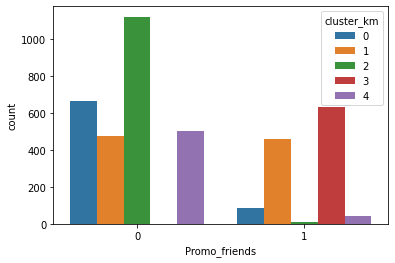

Распределение переменной Phone по кластерам


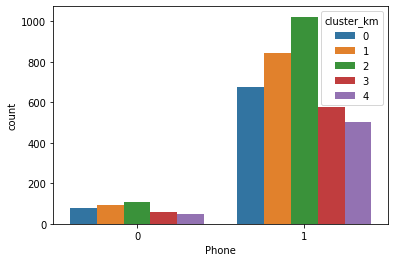

Распределение переменной Contract_period по кластерам


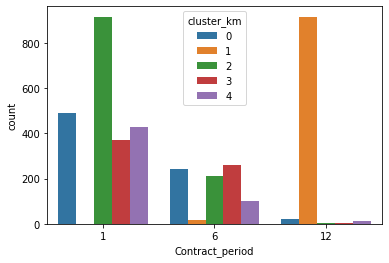

Распределение переменной Group_visits по кластерам


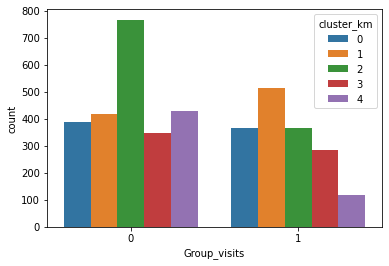

Распределение переменной Month_to_end_contract по кластерам


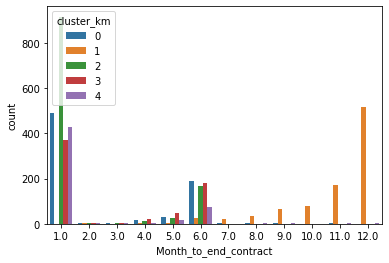

Распределение переменной Churn по кластерам


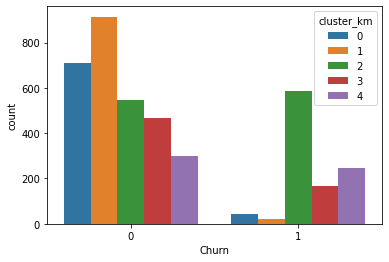

In [15]:
for var in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits'
            , 'Month_to_end_contract', 'Churn']:
    print(f'Распределение переменной {var} по кластерам')
    sns.countplot(data = df, x = var, hue = 'cluster_km')
    plt.show()

Распределение переменной Age по кластерам


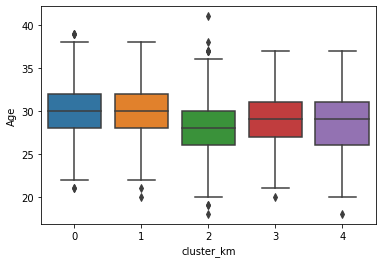

Распределение переменной Avg_additional_charges_total по кластерам


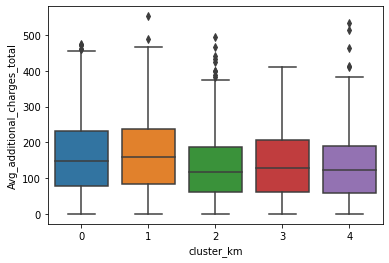

Распределение переменной Lifetime по кластерам


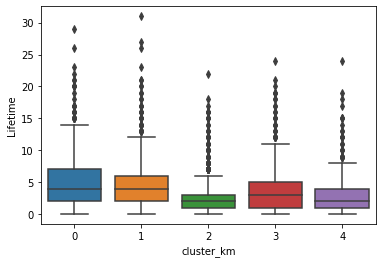

Распределение переменной Avg_class_frequency_total по кластерам


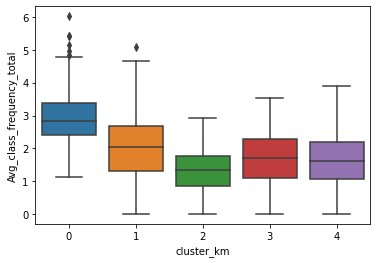

Распределение переменной Avg_class_frequency_current_month по кластерам


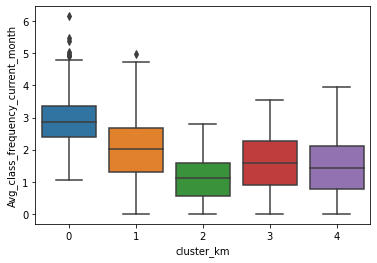

In [16]:
for var in ['Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total'
            , 'Avg_class_frequency_current_month']:
    print(f'Распределение переменной {var} по кластерам')
    sns.boxplot(x ='cluster_km',y = var, data = df)
    plt.show()

Как уже было отмечено, наиболее склонны к оттоку кластеры 2 (~52%) и 4 (около 45%). Также проблематичным выглядит 3 кластер - около четверти (26%) клиентов в нём прекратили пользоваться услугами зала.

Самые надёжные кластеры - нулевой и первый, с долей ушедших пользователей в 6% и 2% соответственно.

## Выводы и базовые рекомендации по работе с клиентами

Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.
Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

Основные выводы:
* У фитнес-центра неплохие показатели удержания: отток в 25% довольно большой, однако 75% не прекращают пользоваться услугами клуба во время действия абонемента.
* Клиенты клуба сравнительно молодые - средний возраст близок к 30 годам.
* Большинство клиентов либо проживают в одном районе с центром, либо работают в этом районе.

Что касается клиентов, склонных к оттоку, можно рекомендовать следующие действия для их удержания:
    
    1) Расширение партнёрской сети. Клиенты, пользующиеся корпоративным тарифом в целом менее склонны к тому, чтобы прекратить пользоваться услугами центра.
    2) Расширение реферальной программы. Действующим клиентам центра можно предлагать дополнительные преимущества за приведённых друзей: бесплатное занятие с тренером центра, символическую скидку на продление абонемента и т.п.
    3) Более активная работа с клиентами, купившими краткосрочный абонемент: информирование об имеющихся групповых программах может оказать благоприятный эффект. В целом, задача состоит в формировании привычки посещения центра - увеличении показателя посещений в неделю.
    4) Стоит рассмотреть возможность для досрочного продления абонемента. Клиенты, чей абонемент подходит к концу, с большей вероятностью перестанут посещать центр ещё до окончания абонемента. Особые условия и информирование по телефону / в мессенджерах и т.д. заблаговременно (в зависимости от срока действия абонемента - хотя бы за неделю для клиентов с самым коротким абонементом и за 1-2 месяца для клиентов с абонементом на 6/12 месяцев) потенциально позволит повысить удержание клиентов с высоким риском оттока.
    
Реализация этих мер позволит сократить отток клиентов.